# Cancer_Insurance

In [2]:
import numpy as np
import pandas as pd
import pymysql as mysql
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
conn=mysql.connect(host='localhost',port=int(3306),user='root',passwd='xxxxxxxxx',db='cancer_insurance')

In [5]:
tableNames = pd.read_sql("""SHOW TABLES""", conn)
print(tableNames)

  Tables_in_cancer_insurance
0                     cancer
1                   customer
2                    factors
3                  insurance
4             insurance_info
5                   symptoms


In [15]:
cancer_df = pd.read_sql("select * from cancer", conn)

insurance_df = pd.read_sql("select * from insurance", conn)

customer_df = pd.read_sql("select * from customer", conn)

factors_df = pd.read_sql("select * from factors", conn)

insurance_info_df = pd.read_sql("select * from insurance_info", conn)

symptoms_df = pd.read_sql("select * from symptoms", conn)

In [17]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1730 non-null   int64 
 1   Gender                    1730 non-null   int64 
 2   Air_Pollution             1730 non-null   int64 
 3   Alcohol_use               1730 non-null   int64 
 4   Dust_Allergy              1730 non-null   int64 
 5   OccuPational_Hazards      1730 non-null   int64 
 6   Genetic_Risk              1730 non-null   int64 
 7   chronic_Lung_Disease      1730 non-null   int64 
 8   Balanced_Diet             1730 non-null   int64 
 9   Obesity                   1730 non-null   int64 
 10  Smoking                   1730 non-null   int64 
 11  Passive_Smoker            1730 non-null   int64 
 12  Chest_Pain                1730 non-null   int64 
 13  Coughing_of_Blood         1730 non-null   int64 
 14  Fatigue                 

In [18]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Patient_Id   1730 non-null   int64
 1   Customer_Id  1730 non-null   int64
 2   Age          1730 non-null   int64
 3   Gender       1730 non-null   int64
 4   Children     1730 non-null   int64
dtypes: int64(5)
memory usage: 67.7 KB


In [20]:
factors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_Id            1730 non-null   int64 
 1   Air_Pollution         1730 non-null   int64 
 2   Alcohol_use           1730 non-null   int64 
 3   Dust_Allergy          1730 non-null   int64 
 4   OccuPational_Hazards  1730 non-null   int64 
 5   Genetic_Risk          1730 non-null   int64 
 6   chronic_Lung_Disease  1730 non-null   int64 
 7   Balanced_Diet         1730 non-null   int64 
 8   Level                 1730 non-null   object
dtypes: int64(8), object(1)
memory usage: 121.8+ KB


In [22]:
insurance_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer_Id  1730 non-null   int64 
 1   Region       1730 non-null   object
 2   Smoker       1730 non-null   object
 3   BMI          1730 non-null   object
 4   Charge       1730 non-null   object
dtypes: int64(1), object(4)
memory usage: 67.7+ KB


In [21]:
symptoms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient_Id                1730 non-null   int64 
 1   Chest_Pain                1730 non-null   int64 
 2   Coughing_of_Blood         1730 non-null   int64 
 3   Fatigue                   1730 non-null   int64 
 4   Weight_Loss               1730 non-null   int64 
 5   Shortness_of_Breath       1730 non-null   int64 
 6   Wheezing                  1730 non-null   int64 
 7   Swallowing_Difficulty     1730 non-null   int64 
 8   Clubbing_of_Finger_Nails  1730 non-null   int64 
 9   Frequent_Cold             1730 non-null   int64 
 10  Dry_Cough                 1730 non-null   int64 
 11  Snoring                   1730 non-null   int64 
 12  Level                     1730 non-null   object
dtypes: int64(12), object(1)
memory usage: 175.8+ KB


## People by region

In [10]:
region = "select region, count(*) as cnt from insurance group by region"
dfregion = pd.read_sql_query(region, conn)

print(dfregion)

      region  cnt
0  southwest  325
1  southeast  364
2  northwest  325
3  northeast  324


## Level of Cancer vs Male/Female and Level of Cancer vs Different Factors

In [82]:
lvlvs = "select level, sum(case when gender=1 then 1 else 0 end ) as males,sum(case when gender=2 then 1 else 0 end) as females,(sum(case when gender=1 then 1 else 0 end )*100.00)/count(*) as male_percent,(sum(case when gender=2 then 1 else 0 end )*100.00)/count(*) as female_percent,avg(air_pollution) as avg_pollution, avg(Alcohol_use) as avg_alcohol, avg(dust_allergy) as avg_dust_all,avg(occupational_hazards) as avg_occ_hazards, avg(genetic_risk) as avg_genetic, avg(chronic_lung_disease) as avg_lung_dis,avg(balanced_diet) as avg_balanced_diet, avg(obesity) as savg_obesity, avg(smoking) as avg_smoking, avg(passive_smoker) as avg_passive_smoking,avg(chest_pain) as avg_chests_pain, avg(coughing_of_blood) as avg_cough_blood, avg(fatigue) as avg_fatigue, avg(weight_loss) as avg_wt_loss,avg(shortness_of_breath) as avg_shortness_breath, avg(wheezing) as avg_wheezing, avg(swallowing_difficulty) as avg_swallowing_diff,avg(clubbing_of_finger_nails) as avg_clubbing_finger_nails, avg(frequent_cold) as savg_frequent_cold, avg(dry_cough) as avg_dry_cough,avg(snoring) as avg_snoring, avg(children*1.00) avg_children from cancer group by level order by females desc "
dflvlvs = pd.read_sql_query(lvlvs, conn)

print(dflvlvs)

    level  males  females  male_percent  female_percent  avg_pollution  \
0     Low  234.0    302.0     43.656716       56.343284         2.6399   
1  Medium  320.0    241.0     57.040998       42.959002         2.7166   
2    High  461.0    172.0     72.827804       27.172196         5.6019   

   avg_alcohol  avg_dust_all  avg_occ_hazards  avg_genetic  ...  avg_fatigue  \
0       2.1511        2.9478           2.8302       2.5784  ...       2.1884   
1       4.1408        5.3636           4.6043       4.2032  ...       3.4314   
2       6.8325        6.5908           6.4376       6.3697  ...       5.5087   

   avg_wt_loss  avg_shortness_breath  avg_wheezing  avg_swallowing_diff  \
0       2.4776                2.6325        2.6549               3.0560   
1       4.2264                4.5829        4.8111               4.2353   
2       4.6256                5.4092        3.9384               4.0379   

   avg_clubbing_finger_nails  savg_frequent_cold  avg_dry_cough  avg_snoring  \
0

## Avg Traits with Probabiliy of Cancers in Age Groups

In [83]:
Agevstrait = "select  case when age between 0 and 10 then '0-10' when age between 11 and 20 then '11-20' when age between 21 and 30 then '21-30' when age between 31 and 40 then '31-40' when age between 41 and 50 then '41-50' when age between 51 and 60 then '51-60' when age between 61 and 70 then '61-70' else '>70' end as age_group, sum(case when gender=1 then 1 else 0 end ) as males, sum(case when gender=2 then 1 else 0 end) as females, sum( case when Level='Low' then 1 else 0 end) as low_prob, round((sum( case when Level='Low' then 1 else 0 end) *100.00)/count(*),2) as perc_low_prob, sum( case when Level='Medium' then 1 else 0 end) as medium_prob, round((sum( case when Level='Medium' then 1 else 0 end) *100.00)/count(*),2) as perc_medium_prob, sum( case when Level='High' then 1 else 0 end) as high_prob, round((sum( case when Level='High' then 1 else 0 end) *100.00)/count(*),2) as perc_high_prob, avg(air_pollution) as avg_pollution, avg(Alcohol_use) as avg_alcohol, avg(dust_allergy) as avg_dust_all, avg(occupational_hazards) as avg_occ_hazards, avg(genetic_risk) as avg_genetic, avg(chronic_lung_disease) as avg_lung_dis, avg(balanced_diet) as avg_balanced_diet, avg(obesity) as savg_obesity, avg(smoking) as avg_smoking, avg(passive_smoker) as avg_passive_smoking, avg(chest_pain) as avg_chests_pain, avg(coughing_of_blood) as avg_cough_blood, avg(fatigue) as avg_fatigue, avg(weight_loss) as avg_wt_loss, avg(shortness_of_breath) as avg_shortness_breath, avg(wheezing) as avg_wheezing, avg(swallowing_difficulty) as avg_swallowing_diff, avg(clubbing_of_finger_nails) as avg_clubbing_finger_nails, avg(frequent_cold) as savg_frequent_cold, avg(dry_cough) as avg_dry_cough, avg(snoring) as avg_snoring, avg(children*1.00) avg_children from cancer group by case when age between 0 and 10 then '0-10' when age between 11 and 20 then '11-20' when age between 21 and 30 then '21-30' when age between 31 and 40 then '31-40' when age between 41 and 50 then '41-50' when age between 51 and 60 then '51-60' when age between 61 and 70 then '61-70' else '>70' end order by age_group"
dfAgevstrait = pd.read_sql_query(Agevstrait, conn)

print(dfAgevstrait)

  age_group  males  females  low_prob  perc_low_prob  medium_prob  \
0     11-20   34.0     26.0      13.0          21.67         17.0   
1     21-30  220.0    201.0     177.0          42.04         96.0   
2     31-40  385.0    219.0     110.0          18.21        247.0   
3     41-50  234.0    160.0     122.0          30.96        152.0   
4     51-60   86.0     78.0      75.0          45.73         40.0   
5     61-70   56.0     31.0      39.0          44.83          9.0   

   perc_medium_prob  high_prob  perc_high_prob  avg_pollution  ...  \
0             28.33       30.0           50.00         4.5000  ...   
1             22.80      148.0           35.15         3.7910  ...   
2             40.89      247.0           40.89         3.8775  ...   
3             38.58      120.0           30.46         3.3376  ...   
4             24.39       49.0           29.88         3.5244  ...   
5             10.34       39.0           44.83         4.4138  ...   

   avg_fatigue  avg_wt_lo

## avg bmi in correspondance to level of cancer

In [6]:
bmivschance = "select c.level, avg(i.bmi) as avg_bmi from (select *, case when age between 0 and 10 then '0-10' when age between 11 and 20 then '11-20' when age between 21 and 30 then '21-30' when age between 31 and 40 then '31-40' when age between 41 and 50 then '41-50' when age between 51 and 60 then '51-60' when age between 61 and 70 then '61-70' else '>70' end as age_group, case when gender=1 then 'male' else 'female' end as gen from cancer where age between 21 and 50) c left join (select *, case when age between 0 and 10 then '0-10' when age between 11 and 20 then '11-20' when age between 21 and 30 then '21-30' when age between 31 and 40 then '31-40' when age between 41 and 50 then '41-50' when age between 51 and 60 then '51-60' when age between 61 and 70 then '61-70' else '>70' end as age_group from insurance where age between 21 and 50) i on c.age_group=i.age_group and c.gen=i.sex group by c.level" 
dfbmivschance = pd.read_sql_query(bmivschance, conn)

print(dfbmivschance)

    Level    avg_bmi
0     Low  30.134522
1    High  30.489967
2  Medium  30.513436


## average bmi per genders plot

In [23]:
cancer_df.mean()

Age                         37.949133
Gender                       1.413295
Air_Pollution                3.748555
Alcohol_use                  4.509249
Dust_Allergy                 5.064162
OccuPational_Hazards         4.725434
Genetic_Risk                 4.492486
chronic_Lung_Disease         4.257225
Balanced_Diet                4.496532
Obesity                      4.486705
Smoking                      3.975145
Passive_Smoker               4.195954
Chest_Pain                   4.442197
Coughing_of_Blood            4.859538
Fatigue                      3.806358
Weight_Loss                  3.830636
Shortness_of_Breath          4.280925
Wheezing                     3.823699
Swallowing_Difficulty        3.797688
Clubbing_of_Finger_Nails     3.875145
Frequent_Cold                3.555491
Dry_Cough                    3.702890
Snoring                      2.945665
children                     1.330636
dtype: float64

In [24]:
cancer_df.Gender.value_counts()

1    1015
2     715
Name: Gender, dtype: int64

In [25]:
cancer_df[cancer_df.Gender==1]

,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,chronic_Lung_Disease,Balanced_Diet,Obesity,...,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring,Level,children,smoker,region,Bmi_cat,Charge_cat
0,33,1,2,4,5,4,3,2,2,4,...,1,2,3,4,Low,0,no,northwest,Normal,Medium
1,33,1,2,4,5,4,3,2,2,4,...,1,2,3,4,Low,2,no,southeast,High,Low
2,33,1,2,4,5,4,3,2,2,4,...,1,2,3,4,Low,0,no,northeast,High,Medium
3,33,1,2,4,5,4,3,2,2,4,...,1,2,3,4,Low,1,no,southeast,High,Medium
4,33,1,2,4,5,4,3,2,2,4,...,1,2,3,4,Low,5,no,southwest,High,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,29,1,6,7,7,7,7,6,7,7,...,7,2,3,1,High,3,no,northeast,Normal,Low
1726,29,1,6,7,7,7,7,6,7,7,...,7,2,3,1,High,0,yes,northeast,Normal,Medium
1727,29,1,6,7,7,7,7,6,7,7,...,7,2,3,1,High,2,no,northwest,High,Low
1728,29,1,6,7,7,7,7,6,7,7,...,7,2,3,1,High,1,no,southeast,High,Low


In [28]:
cancer_df["Gender"][cancer_df.Gender==1].mean()

1.0

In [29]:
cancer_df["Gender"][cancer_df.Gender==2].mean()

2.0

In [41]:
grp1 = insurance_df.groupby(by="sex")

In [43]:
grp1.mean()["bmi"]

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64

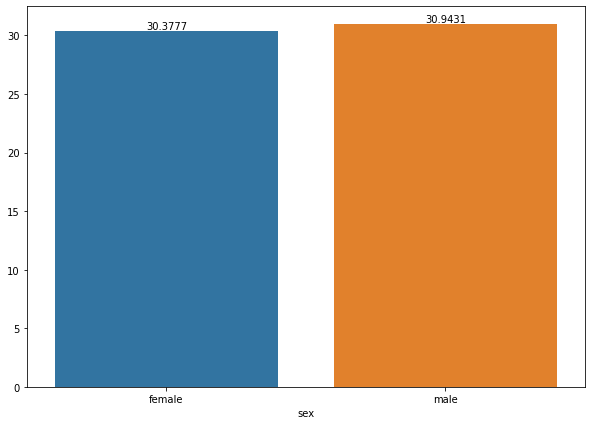

In [48]:
plt.figure(figsize = (10,7))
ax = sns.barplot(x=grp1.mean()["bmi"].index, y=grp1.mean()["bmi"].values)
for i in ax.containers:
    ax.bar_label(i,)

## looking at avg traits by gender plot

In [51]:
numerical_columns = cancer_df.dtypes[cancer_df.dtypes=="int64"].index

In [53]:
numerical_columns

Index(['Age', 'Gender', 'Air_Pollution', 'Alcohol_use', 'Dust_Allergy',
       'OccuPational_Hazards', 'Genetic_Risk', 'chronic_Lung_Disease',
       'Balanced_Diet', 'Obesity', 'Smoking', 'Passive_Smoker', 'Chest_Pain',
       'Coughing_of_Blood', 'Fatigue', 'Weight_Loss', 'Shortness_of_Breath',
       'Wheezing', 'Swallowing_Difficulty', 'Clubbing_of_Finger_Nails',
       'Frequent_Cold', 'Dry_Cough', 'Snoring', 'children'],
      dtype='object')

In [54]:
numerical_df = cancer_df[numerical_columns]

In [55]:
numerical_df

,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,chronic_Lung_Disease,Balanced_Diet,Obesity,...,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring,children
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,2
2,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
3,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
4,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,29,1,6,7,7,7,7,6,7,7,...,2,7,6,7,6,7,2,3,1,3
1726,29,1,6,7,7,7,7,6,7,7,...,2,7,6,7,6,7,2,3,1,0
1727,29,1,6,7,7,7,7,6,7,7,...,2,7,6,7,6,7,2,3,1,2
1728,29,1,6,7,7,7,7,6,7,7,...,2,7,6,7,6,7,2,3,1,1


In [56]:
group2 = numerical_df.groupby(by = "Gender")

In [57]:
group2.mean()

,Age,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,chronic_Lung_Disease,Balanced_Diet,Obesity,Smoking,...,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring,children
Gender,,,,,,,,,,,,,,,,,,,,,
1,38.109360,4.127094,5.019704,5.458128,5.135961,4.964532,4.676847,4.809852,4.785222,4.296552,...,4.096552,4.087685,4.536946,3.977340,3.830542,4.187192,3.628571,3.949754,3.113300,1.389163
2,37.721678,3.211189,3.784615,4.504895,4.142657,3.822378,3.661538,4.051748,4.062937,3.518881,...,3.394406,3.465734,3.917483,3.605594,3.751049,3.432168,3.451748,3.352448,2.707692,1.247552


In [58]:
group2_mean = group2.mean()

In [60]:
group2_mean.reset_index(inplace = True)

In [61]:
group2_mean

,Gender,Age,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,chronic_Lung_Disease,Balanced_Diet,Obesity,...,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring,children
0,1,38.109360,4.127094,5.019704,5.458128,5.135961,4.964532,4.676847,4.809852,4.785222,...,4.096552,4.087685,4.536946,3.977340,3.830542,4.187192,3.628571,3.949754,3.113300,1.389163
1,2,37.721678,3.211189,3.784615,4.504895,4.142657,3.822378,3.661538,4.051748,4.062937,...,3.394406,3.465734,3.917483,3.605594,3.751049,3.432168,3.451748,3.352448,2.707692,1.247552


In [64]:
ycolumns = group2_mean.columns[1:]

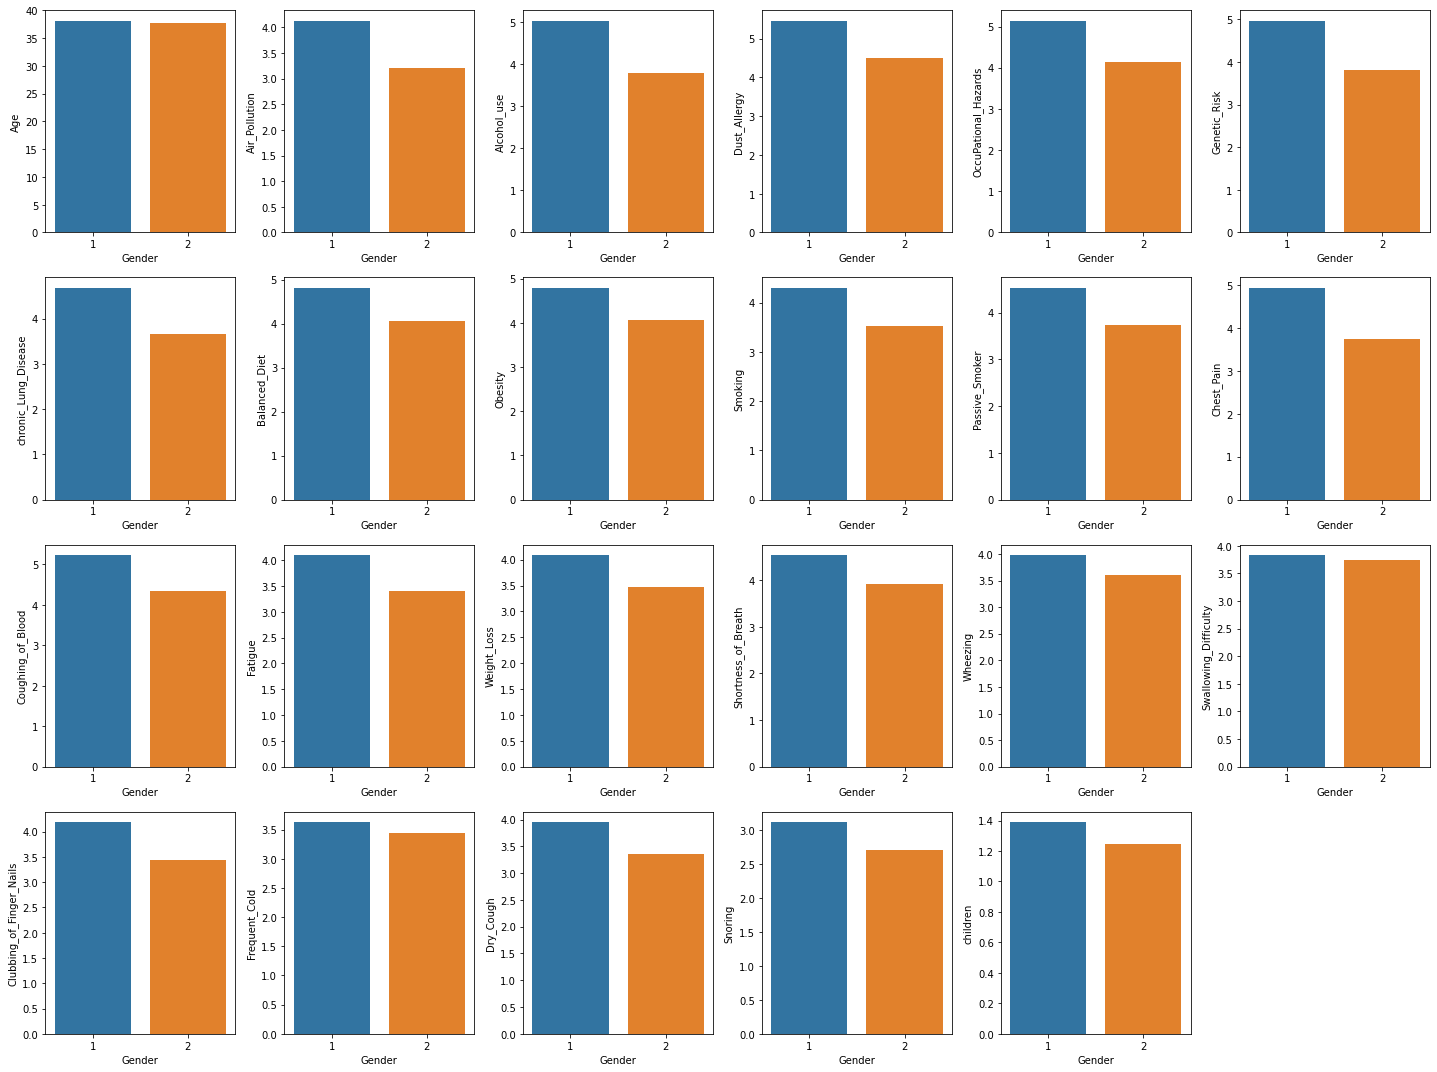

In [72]:
plt.figure(figsize = (20,15))
for num,y in enumerate(ycolumns):
    plt.subplot(4,6,num+1)
    sns.barplot(x = group2_mean.Gender, y = group2_mean[y])
plt.tight_layout()
plt.show()

# Level vs trait plot

In [74]:
numerical_df["Level"] = cancer_df["Level"].copy()

In [75]:
group3 = numerical_df.groupby(by = "Level")

In [77]:
group3mean = group3.mean()

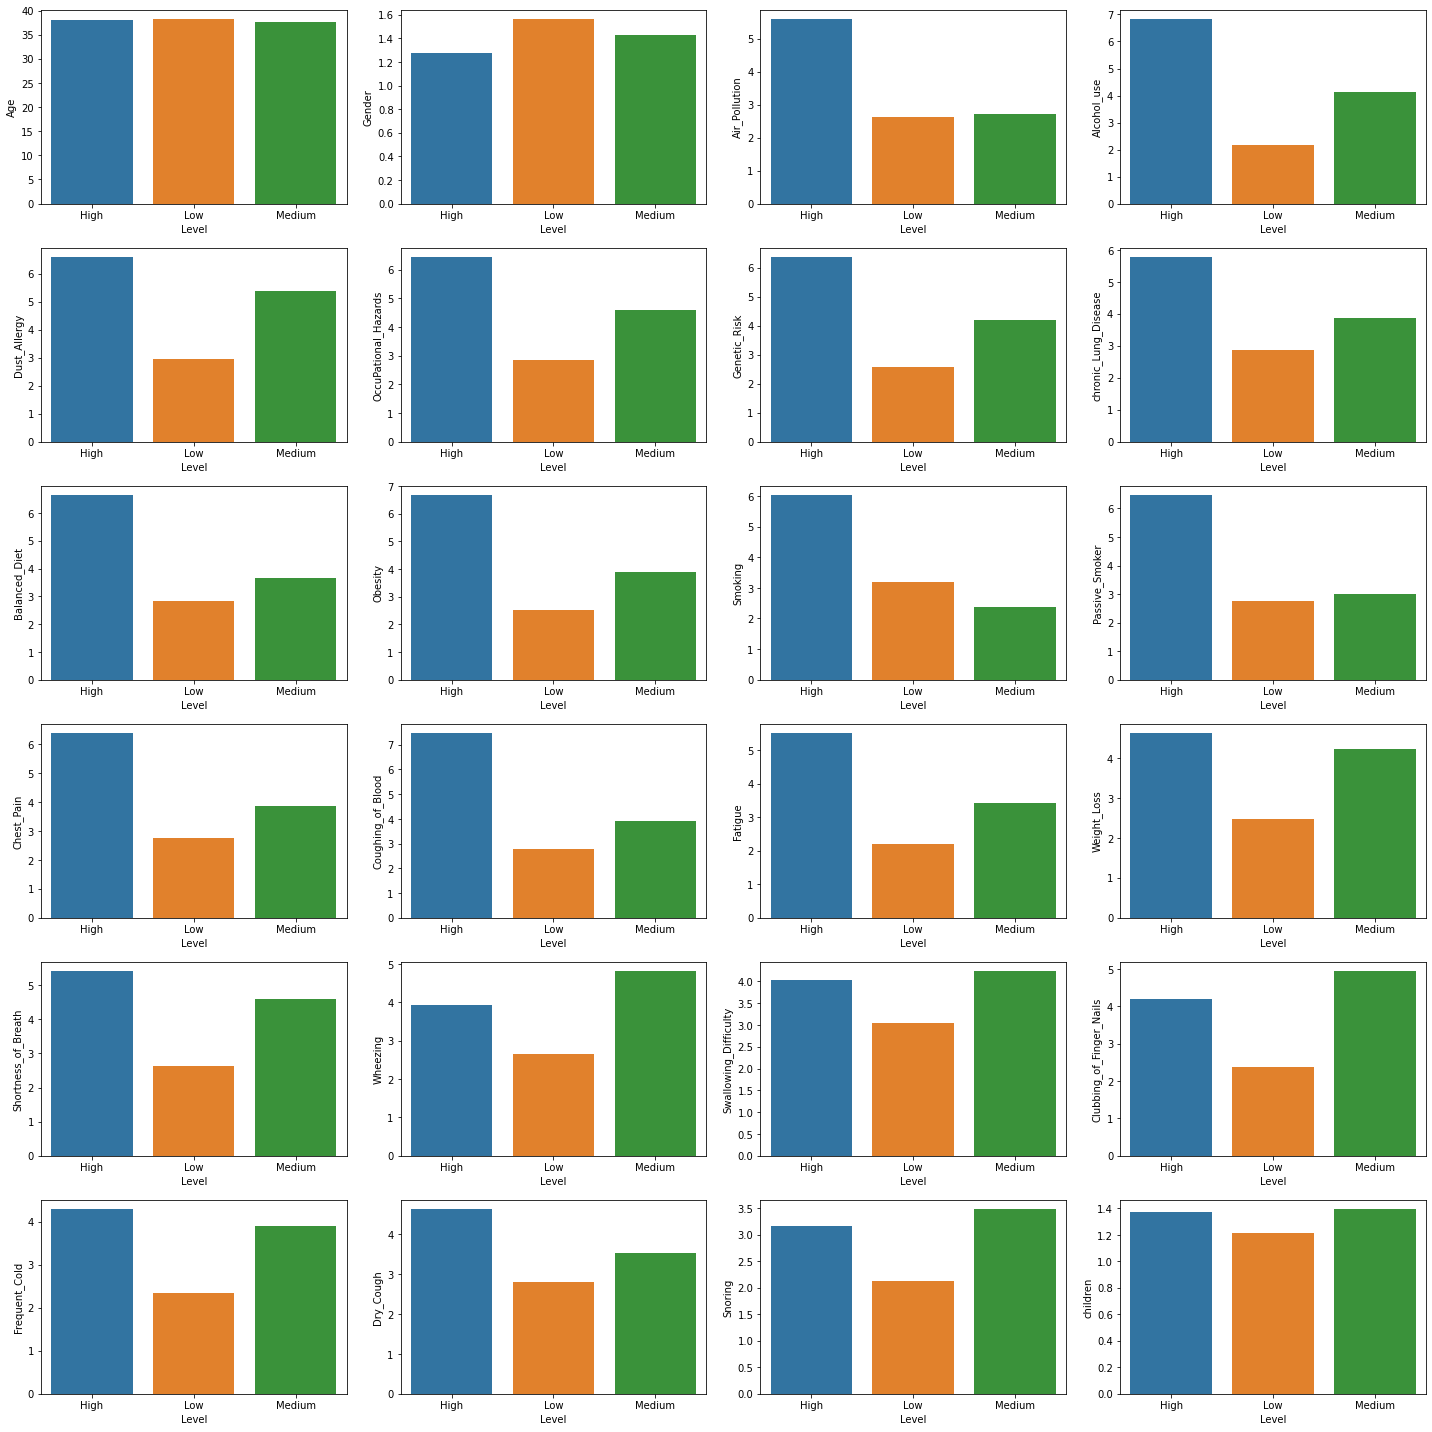

In [80]:
plt.figure(figsize = (20,20))
for num,y in enumerate(group3mean.columns):
    plt.subplot(6,4,num+1)
    sns.barplot(x = group3mean.index, y = group3mean[y])
plt.tight_layout()
plt.show()